In [45]:
#import necessary libraries

import matplotlib
from matplotlib import pyplot as plt 
import pandas as pd
import numpy as npy


In [46]:
#Import csv File
df = pd.read_csv('house_pricing_dataset.csv')
print(df)

                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0       

In [47]:
df.describe

<bound method NDFrame.describe of                      date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view 

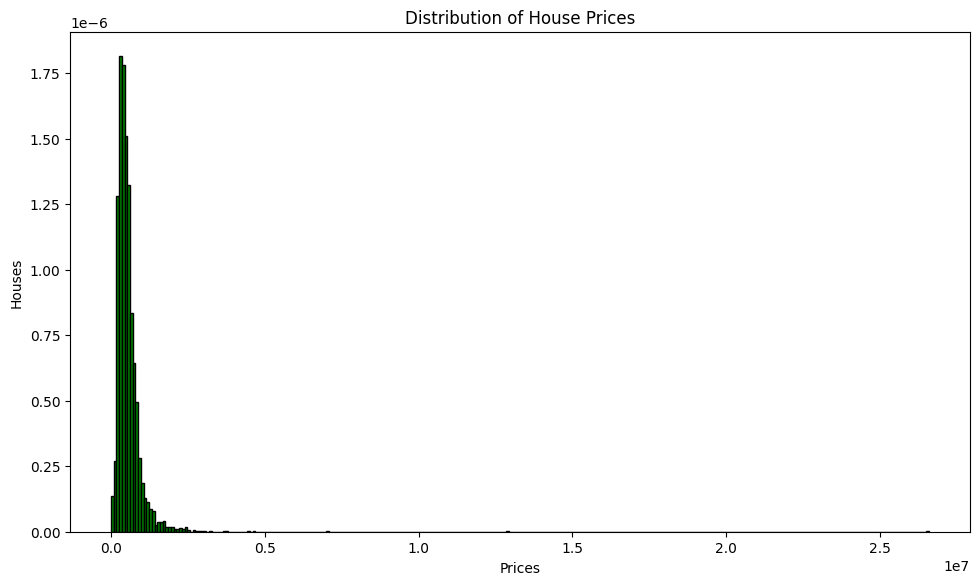

In [48]:
#The Distribution of house prices using a Histogram 
fig = plt.figure(figsize=(9,5))
his=fig.add_axes([0,0,1,1])
plt.hist(df['price'], density=True, color='Green', edgecolor='black', bins=300)
plt.xlabel('Prices')
plt.ylabel('Houses')
plt.title('Distribution of House Prices')
plt.savefig('Distribution of House Prices.png')
plt.show()

In [49]:
#Average house prices across the top 10 cities
avg = df.groupby('city')['price'].mean()
city= avg.sort_values(ascending=False)
avgprice_topcity= city.head(10)
avgprice_topcity

city
Medina                2.046559e+06
Clyde Hill            1.321945e+06
Yarrow Point          1.194838e+06
Mercer Island         1.123818e+06
Bellevue              8.471807e+05
Beaux Arts Village    7.450000e+05
Fall City             6.926818e+05
Sammamish             6.869176e+05
Redmond               6.676495e+05
Newcastle             6.660467e+05
Name: price, dtype: float64

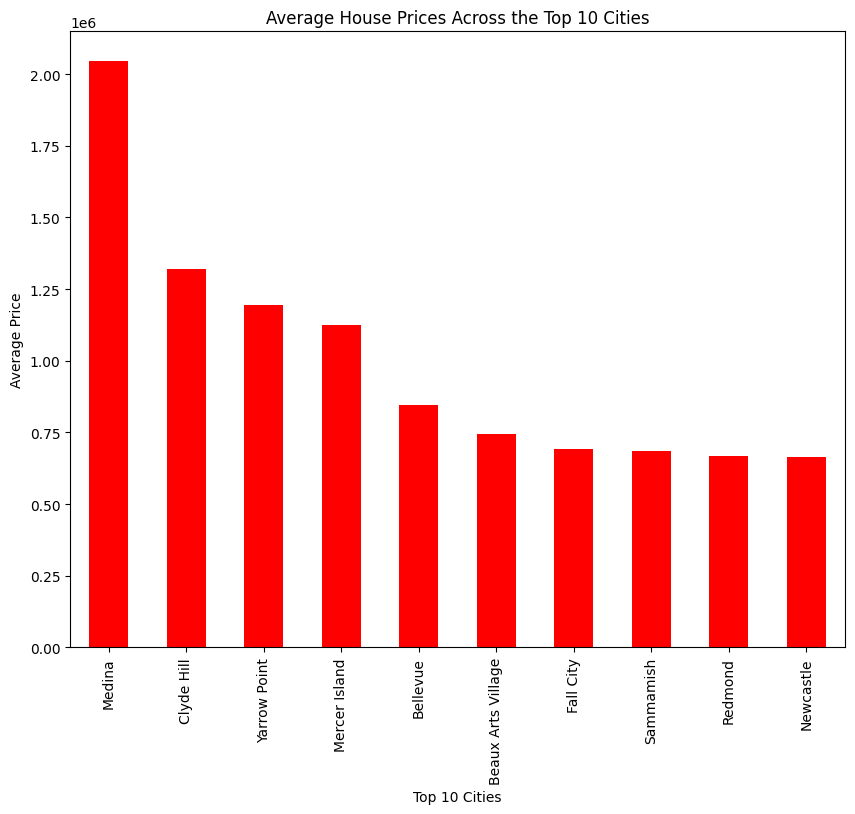

In [50]:
#Distribution of average house prices across the top 10 cities, using bar chart
fig = plt.figure(figsize=(10,8))
avgprice_topcity.plot(kind = 'bar', width=0.5, color='red')
plt.xlabel('Top 10 Cities')
plt.ylabel('Average Price')
plt.title('Average House Prices Across the Top 10 Cities')
plt.savefig('Average House Prices Across the Top 10 Cities.png')
plt.show()


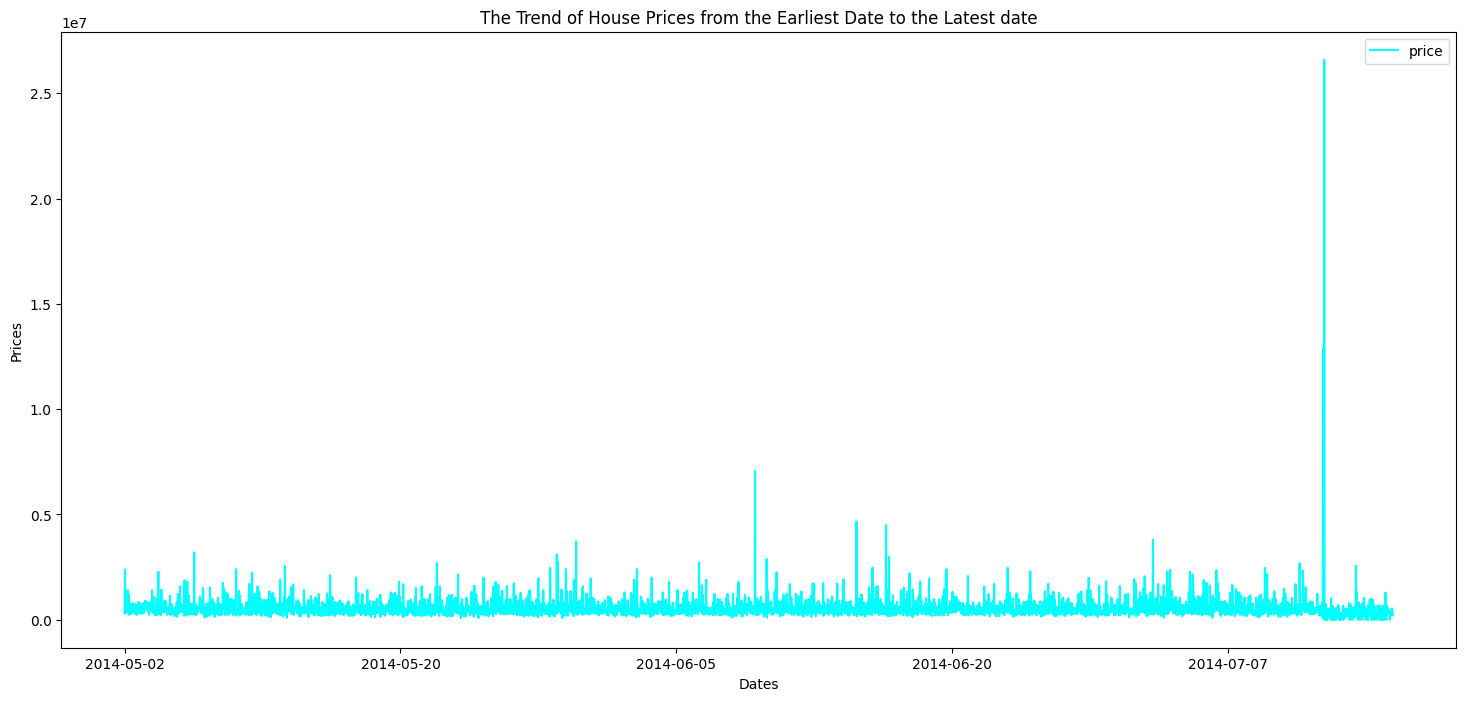

In [51]:
#The trend of house prices from the earliest date to the latest date in the dataset
df['date_time'] = pd.to_datetime(df['date'])
df['date_time'] = pd.to_datetime(df.date_time).dt.strftime('%Y-%m-%d')
df.plot(x='date_time', y= 'price',color='cyan', figsize = (18,8))
plt.legend(loc = 'upper right')
plt.xlabel("Dates")
plt.ylabel("Prices")
plt.title('The Trend of House Prices from the Earliest Date to the Latest date')
plt.savefig('The Trend of House Prices from the Earliest Date to the Latest date.png')
plt.show()

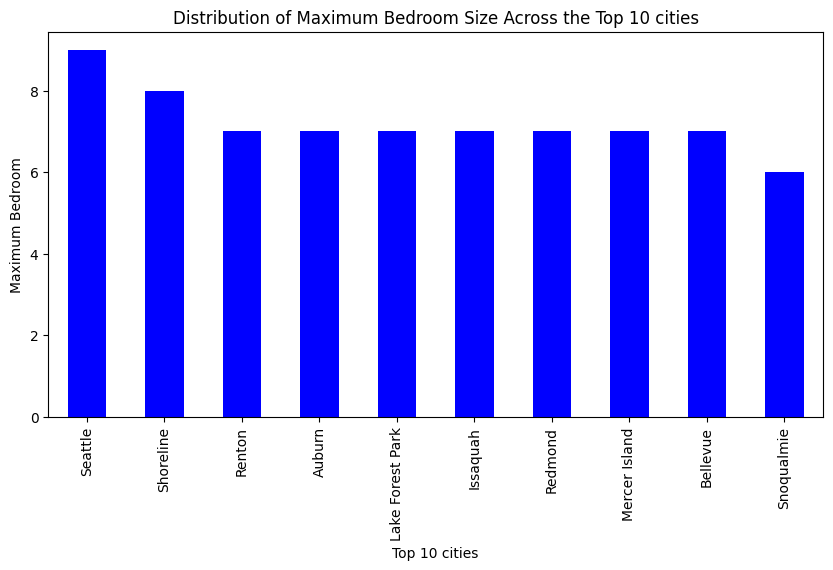

In [52]:
#Distribution of maximum bedroom size across the top 10 cities, using bar chart
max = df.groupby('city')['bedrooms'].max()
max_bedroom= max.sort_values(ascending=False)
bedmax_topcity= max_bedroom.head(10)
#bedmax_topcity

fig = plt.figure(figsize=(10,5))
bedmax_topcity.plot(kind = 'bar', color="blue", width=0.5)
plt.xlabel('Top 10 cities')
plt.ylabel('Maximum Bedroom')
plt.title('Distribution of Maximum Bedroom Size Across the Top 10 cities')
plt.savefig('Distribution of Maximum Bedroom Size Across the Top 10 cities.png')
plt.show()

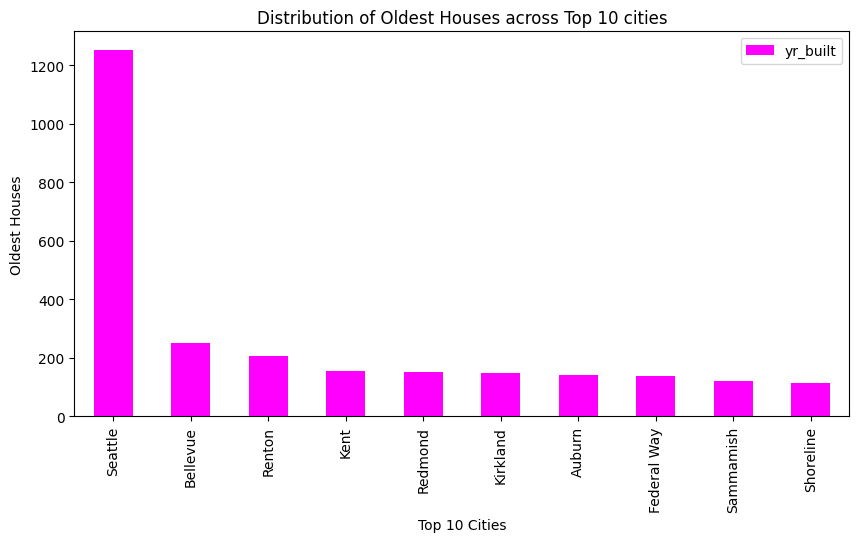

In [53]:
#Distribution of oldest houses across top 10 cities, using bar chat
oldest_houses = df.loc[df['yr_built']< 2000]
top_oldest = oldest_houses.groupby('city')['yr_built'].count()
oldest= top_oldest.sort_values(ascending=False)
oldest_topcity= oldest.head(10)
#oldest_topcity

fig=plt.figure(figsize=(10,5))
oldest_topcity.plot( kind='bar', color='magenta', width=0.5)
plt.legend(loc = 'upper right')
plt.xlabel("Top 10 Cities")
plt.ylabel("Oldest Houses")
plt.title('Distribution of Oldest Houses across Top 10 cities')
plt.savefig('Distribution of Oldest Houses across Top 10 cities.png')
plt.show()

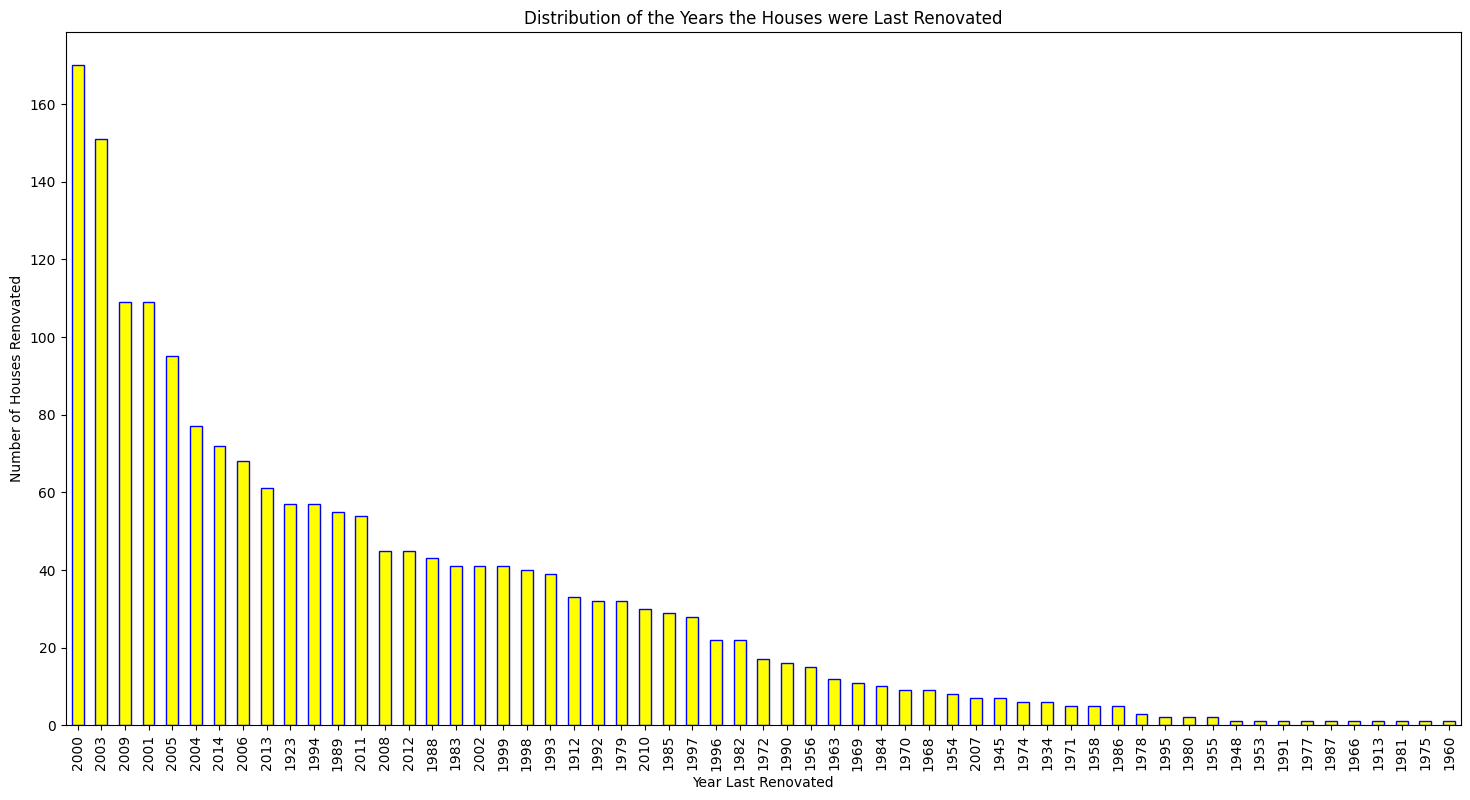

In [54]:
#Distribution of the years the houses were last renovated, using bar chart
house_last_renovated= df.loc[df['yr_renovated']!=0].reset_index()
count_house= house_last_renovated.groupby('yr_renovated')['country'].count()
yr_renovated=count_house.sort_values(ascending=False)
#yr_renovated.head()

fig = plt.figure(figsize=(18,9))
yr_renovated.plot(kind = 'bar',color='yellow', edgecolor='blue', width=0.5)
plt.xlabel('Year Last Renovated')
plt.ylabel('Number of Houses Renovated')
plt.title('Distribution of the Years the Houses were Last Renovated')
plt.savefig('Distribution of the Years the Houses were Last Renovated.png')
plt.show()

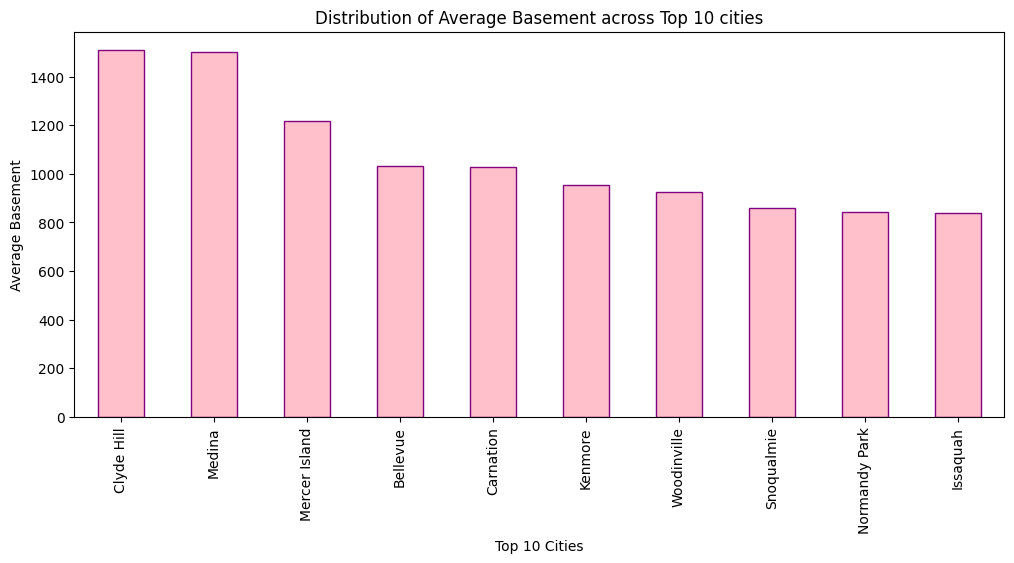

In [55]:
#Distribution of average basement square feets across top 10 cities; using bar chart
square_ft = df.loc[df['sqft_basement']!=0]
top_square_ft = square_ft.groupby('city')['sqft_basement'].mean()
square_ft_avg= top_square_ft.sort_values(ascending=False)
avg_square_ft =square_ft_avg.head(10)
#avg_square_ft

fig = plt.figure(figsize=(12,5))
avg_square_ft.plot(kind = 'bar', color='pink', edgecolor ='purple', width=0.5)
plt.xlabel('Top 10 Cities')
plt.ylabel('Average Basement')
plt.title('Distribution of Average Basement across Top 10 cities')
plt.savefig('Distribution of Average Basement across Top 10 cities.png')
plt.show()

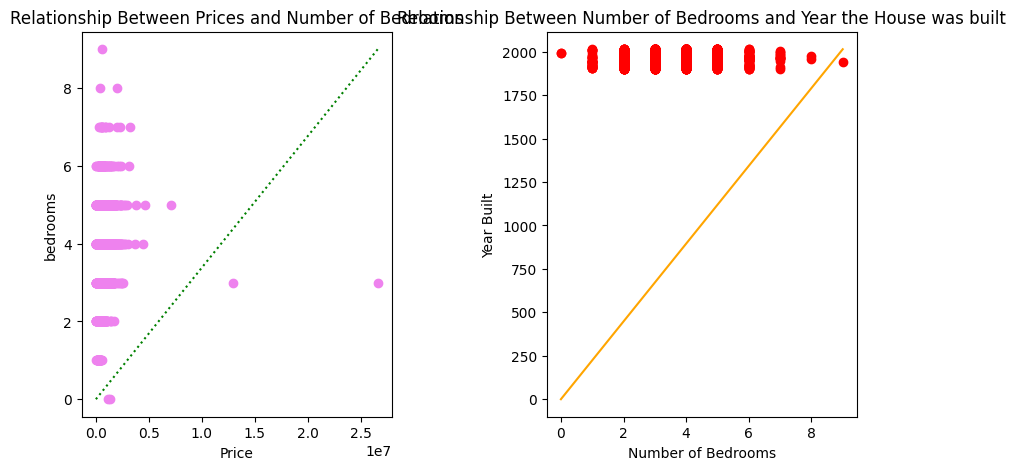

In [67]:
#The relationship between prices and number of bedrooms; using scatter plot
fig,((ax1, ax2))=plt.subplots(nrows=1,ncols=2,figsize=(10,5))

x=[0, 26590000]
y=[0,9]

x1=df['price']
y1=df['bedrooms']

ax1.scatter(x1,y1, color='violet')
ax1.plot(x,y,color='green',linestyle=':')
ax1.set_xlabel('Price')
ax1.set_ylabel('bedrooms')
ax1.set_title('Relationship Between Prices and Number of Bedrooms')
plt.savefig('Relationship Between Prices and Number of Bedrooms.png')
plt.subplots_adjust(wspace=0.5, hspace=0.5)


#Relationship Between Number of Bedrooms and Year the House was Built- Using Scatterplot 
x=[0,9]
y=[0,2014]

x1= df['bedrooms']
y1=df['yr_built']

ax2.scatter(x1,y1, color='red')
ax2.plot(x,y,color='orange',linestyle='-')
ax2.set_xlabel('Number of Bedrooms')
ax2.set_ylabel('Year Built')
ax2.set_title('Relationship Between Number of Bedrooms and Year the House was built')
plt.savefig('Relationship Between Number of Bedrooms and Year the House was buil.png')
plt.subplots_adjust(wspace=0.5, hspace=0.5)